<a href="https://colab.research.google.com/github/JeonJaeeun/machineLearning/blob/main/XGBoost_optuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 분석 준비

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.style.use("ggplot")

In [4]:
import pandas as pd
import numpy as np

In [5]:
import random
np.random.seed(1234)
random.seed(1234)

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
train_df=pd.read_csv('https://raw.githubusercontent.com/JeonJaeeun/machineLearning/main/house-prices-advanced-regression-techniques/train.csv')
test_df=pd.read_csv('https://raw.githubusercontent.com/JeonJaeeun/machineLearning/main/house-prices-advanced-regression-techniques/test.csv')
#submission=pd.read_csv('https://github.com/JeonJaeeun/machineLearning/blob/main/house-prices-advanced-regression-techniques/sample_submission.csv')

데이터 불러오기

In [8]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [10]:
train_df["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [11]:
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [12]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [13]:
all_df["SalePrice"]

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
categories = all_df.columns[all_df.dtypes == "object"]
print(categories)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [16]:
all_df["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [17]:
for cat in categories:
    le = LabelEncoder()
    print(cat)

    all_df[cat].fillna("missing", inplace=True)
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype("category")

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [18]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,4,21.0,1936,1,2,3,3,0,...,0,3,4,4,0,6,2006,8,4,NaN
2915,2916,160,4,21.0,1894,1,2,3,3,0,...,0,3,4,4,0,4,2006,8,0,NaN
2916,2917,20,3,160.0,20000,1,2,3,3,0,...,0,3,4,4,0,9,2006,8,0,NaN
2917,2918,85,3,62.0,10441,1,2,3,3,0,...,0,3,2,2,700,7,2006,8,4,NaN


In [19]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

In [28]:
import lightgbm as lgb
from sklearn.model_selection import KFold
folds = 3
kf = KFold(n_splits=folds)
lgbm_params = {
    "objective":"regression",
    "random_seed":1234,
    "verbose": 10
}
train_X = train_df_le.drop(["SalePrice", "Id"], axis=1)
train_Y = train_df_le["SalePrice"]
from sklearn.metrics import mean_squared_error
from platform import python_version

models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    print(X_train)
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets=lgb_eval,
                          num_boost_round=100)
    best_iteration = model_lgb.best_iteration
    y_pred = model_lgb.predict(X_valid, num_iteration=best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred


      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
487           20        3         70.0    12243      1     2        0   
488          190        3         60.0    10800      1     2        3   
489          180        4         21.0     1526      1     2        3   
490          160        4          NaN     2665      1     2        3   
491           50        3         79.0     9490      1     2        3   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60        3         62.0     7917      1     2        3   
1456          20        3         85.0    13175      1     2        3   
1457          70        3         66.0     9042      1     2        3   
1458          20        3         68.0     9717      1     2        3   
1459          20        3         75.0     9937      1     2        3   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
487            3         0         4  ...   

In [29]:
sum(rmses)/len(rmses)

0.13708353621985223

In [64]:
actual_pred_df = pd.DataFrame({
    "actual" : train_Y,
    "pred" : oof })

<Axes: >

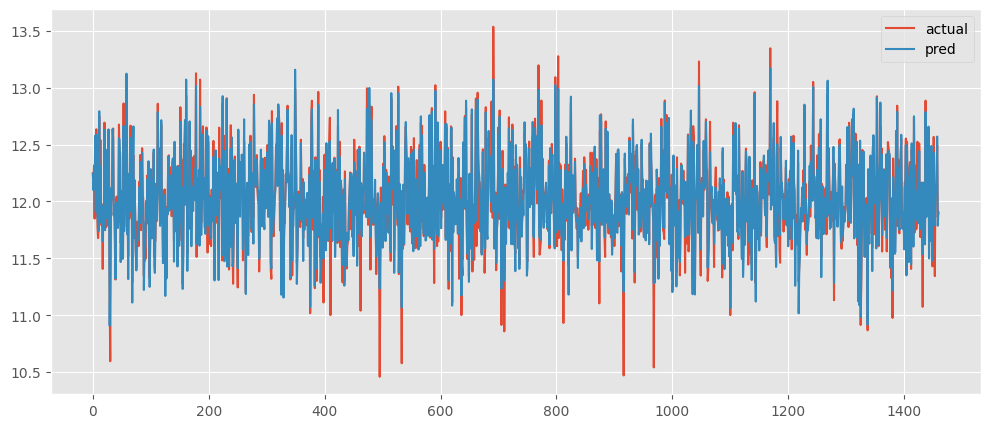

In [65]:
actual_pred_df.plot(figsize=(12,5))

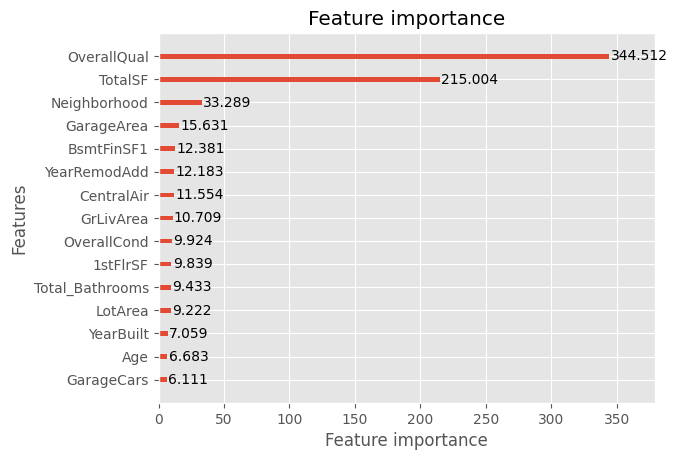

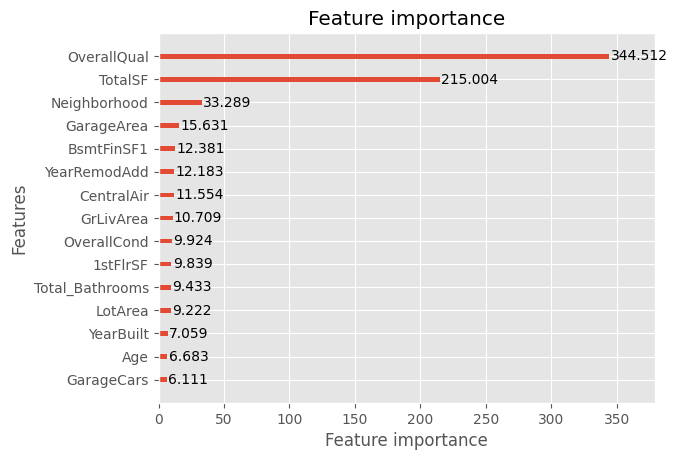

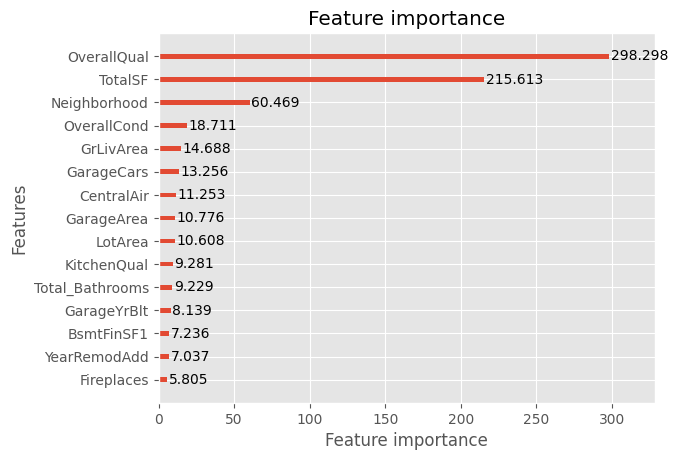

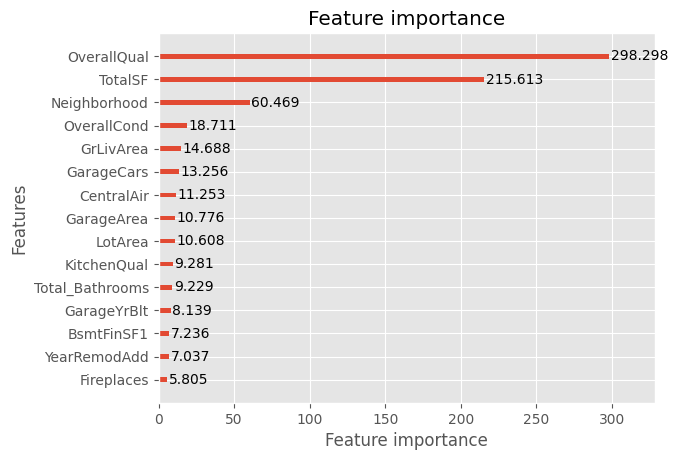

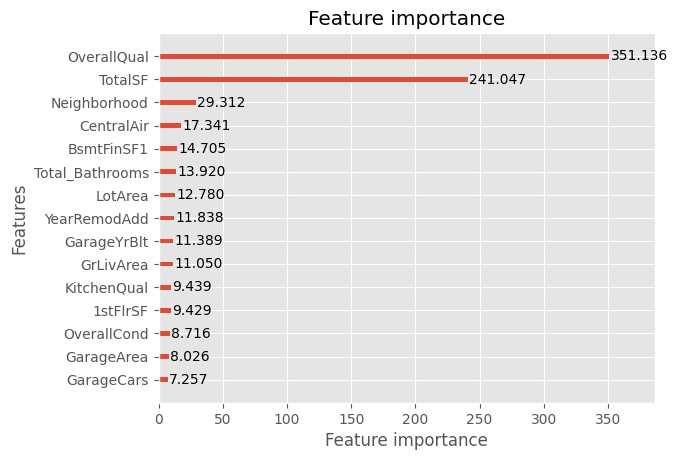

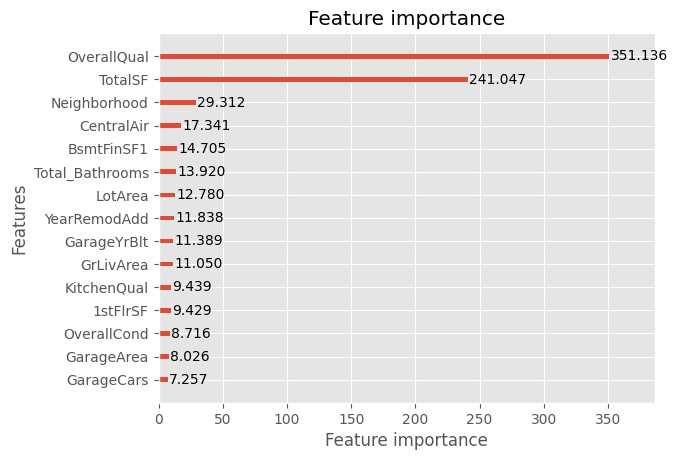

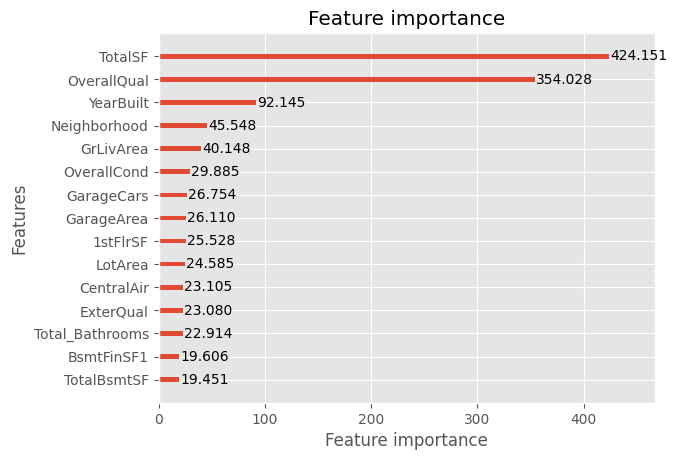

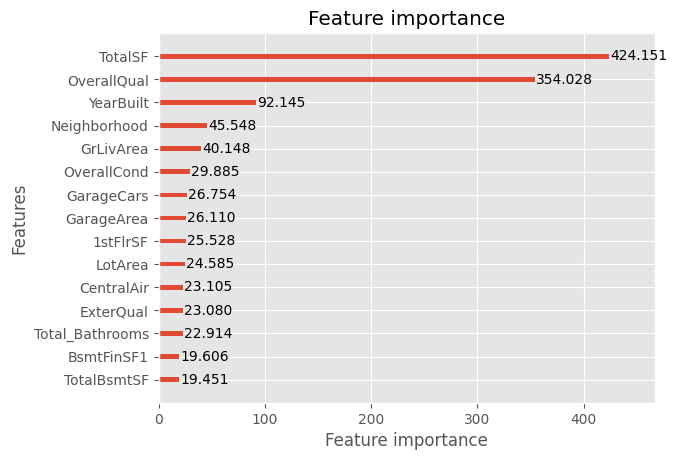

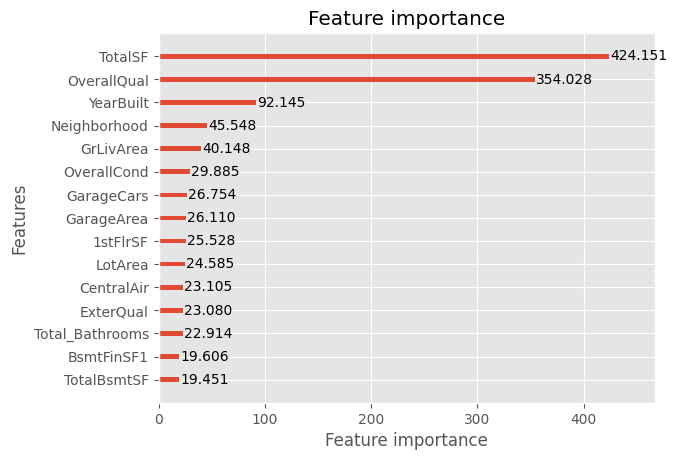

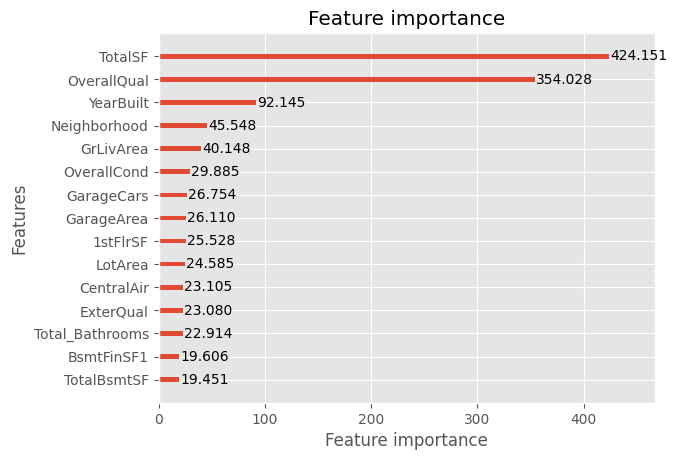

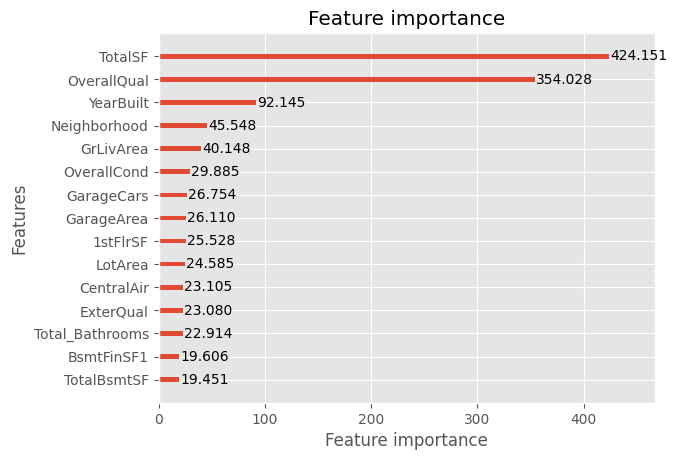

In [67]:
for model in models:
    lgb.plot_importance(model,importance_type="gain", max_num_features=15)

<Axes: ylabel='Frequency'>

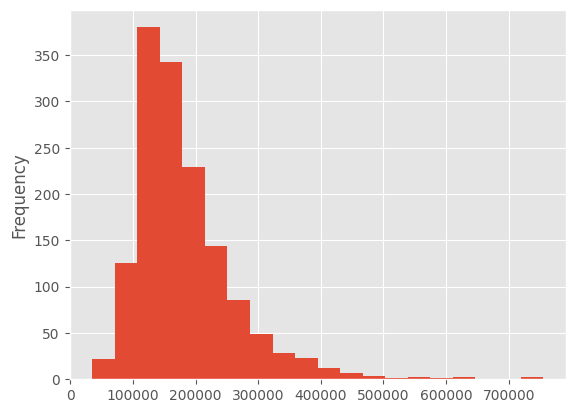

In [68]:
train_df["SalePrice"].describe()

train_df["SalePrice"].plot.hist(bins=20)

In [30]:
np.log(train_df['SalePrice'])

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

<Axes: ylabel='Frequency'>

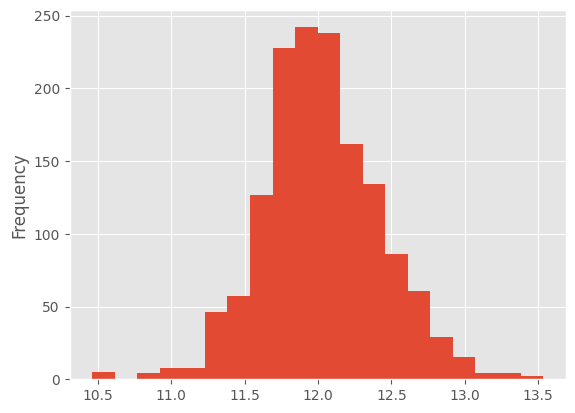

In [69]:
np.log(train_df['SalePrice']).plot.hist(bins=20)

In [31]:
pd.options.mode.chained_assignment = None
train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice","SalePrice_log","Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [33]:
import warnings
warnings.filterwarnings("ignore")

models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets=lgb_eval,
                          num_boost_round=100)
    best_iteration = model_lgb.best_iteration
    y_pred = model_lgb.predict(X_valid, num_iteration=best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.889678
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.460237
[LightGBM] [Debug] init for col-wise cost 0.001300 seconds, init for row-wise cost 0.001695 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 2964
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 74
[LightGBM] [Info] Start training from score 12.017607
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tre

In [34]:
sum(rmses)/len(rmses)

0.07205684342305156

In [35]:
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)
categories = all_df.columns[all_df.dtypes == "object"]
all_df.isnull().sum().sort_values(ascending=False).head(40)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageCond        159
GarageYrBlt       159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
BsmtHalfBath        2
BsmtFullBath        2
Utilities           2
BsmtFinSF1          1
BsmtFinSF2          1
SaleType            1
Electrical          1
GarageCars          1
TotalBsmtSF         1
GarageArea          1
Exterior2nd         1
Exterior1st         1
KitchenQual         1
BsmtUnfSF           1
Fireplaces          0
TotRmsAbvGrd        0
SaleCondition       0
OpenPorchSF         0
YrSold              0
dtype: int64

In [36]:
all_df.PoolQC.value_counts()
all_df.loc[~all_df["PoolQC"].isnull(), "PoolQC"] = 1
all_df.loc[all_df["PoolQC"].isnull(), "PoolQC"] = 0
all_df.PoolQC.value_counts()
all_df.loc[~all_df["MiscFeature"].isnull(), "MiscFeature"] = 1
all_df.loc[all_df["MiscFeature"].isnull(), "MiscFeature"] = 0
all_df.loc[~all_df["Alley"].isnull(), "Alley"] = 1
all_df.loc[all_df["Alley"].isnull(), "Alley"] = 0
HighFacility_col = ["PoolQC","MiscFeature","Alley"]
for col in HighFacility_col:
    if all_df[col].dtype == "object":
        if len(all_df[all_df[col].isnull()]) > 0:
            all_df.loc[~all_df[col].isnull(), col] = 1
            all_df.loc[all_df[col].isnull(), col] = 0
all_df["hasHighFacility"] = all_df["PoolQC"] + all_df["MiscFeature"] + all_df["Alley"]
all_df["hasHighFacility"] = all_df["hasHighFacility"].astype(int)
all_df["hasHighFacility"].value_counts()
all_df = all_df.drop(["PoolQC","MiscFeature","Alley"],axis=1)

In [37]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [72]:
train_df_num = train_df.select_dtypes(include=[np.number])
nonratio_features = ["Id", "MSSubClass", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "MoSold", "YrSold"]
num_features = sorted(list(set(train_df_num) - set(nonratio_features)))
num_features


['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']

In [73]:
train_df_num_rs = train_df_num[num_features]

In [39]:
for col in num_features:
    if train_df_num_rs.describe()[col]["75%"] == 0:
        print(col, len(train_df_num_rs[train_df_num_rs[col] == 0]))
for col in num_features:
    if train_df_num_rs[col].nunique() < 15:
        print(col, train_df_num_rs[col].nunique())
for col in num_features:
    tmp_df = train_df_num_rs[(train_df_num_rs[col] > train_df_num_rs[col].mean() + train_df_num_rs[col].std()*3) | \
    (train_df_num_rs[col] < train_df_num_rs[col].mean() - train_df_num_rs[col].std()*3)]
    print(col, len(tmp_df))

3SsnPorch 1436
BsmtFinSF2 1293
BsmtHalfBath 1378
EnclosedPorch 1252
LowQualFinSF 1434
MiscVal 1408
PoolArea 1453
ScreenPorch 1344
BedroomAbvGr 8
BsmtFullBath 4
BsmtHalfBath 3
Fireplaces 4
FullBath 4
GarageCars 5
HalfBath 3
KitchenAbvGr 4
PoolArea 8
TotRmsAbvGrd 12
1stFlrSF 12
2ndFlrSF 4
3SsnPorch 23
BedroomAbvGr 14
BsmtFinSF1 6
BsmtFinSF2 50
BsmtFullBath 16
BsmtHalfBath 82
BsmtUnfSF 11
EnclosedPorch 51
Fireplaces 5
FullBath 0
GarageArea 7
GarageCars 0
GarageYrBlt 1
GrLivArea 16
HalfBath 12
KitchenAbvGr 68
LotArea 13
LotFrontage 12
LowQualFinSF 20
MasVnrArea 32
MiscVal 8
OpenPorchSF 27
PoolArea 7
SalePrice 22
ScreenPorch 55
TotRmsAbvGrd 12
TotalBsmtSF 10
WoodDeckSF 22


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility,Age,TotalSF,Total_Bathrooms,hasPorch


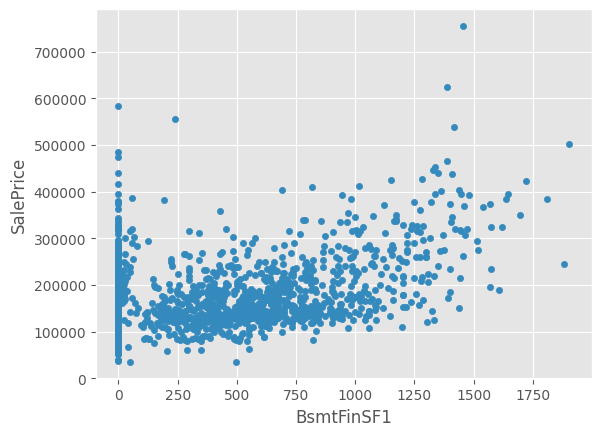

In [74]:
all_df.plot.scatter(x="BsmtFinSF1", y="SalePrice")
all_df[all_df["BsmtFinSF1"] > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility,Age,TotalSF,Total_Bathrooms,hasPorch


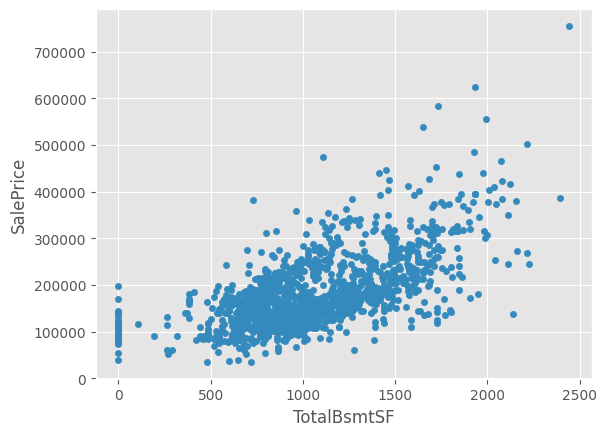

In [75]:
all_df.plot.scatter(x="TotalBsmtSF", y="SalePrice")
all_df[all_df["TotalBsmtSF"] > 6000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility,Age,TotalSF,Total_Bathrooms,hasPorch
2549,2550,20,3,128.0,39290,1,0,0,0,4,...,10,2007,6,5,NaN,0,-1,10190.0,5.0,1


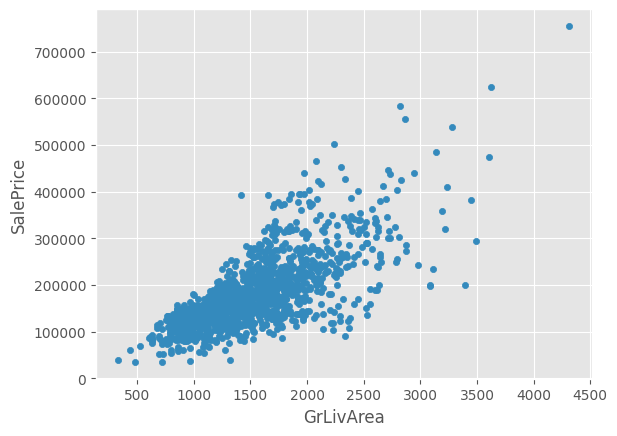

In [76]:

all_df.plot.scatter(x="GrLivArea", y="SalePrice")
all_df[all_df["GrLivArea"] > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility,Age,TotalSF,Total_Bathrooms,hasPorch
2549,2550,20,3,128.0,39290,1,0,0,0,4,...,10,2007,6,5,NaN,0,-1,10190.0,5.0,1


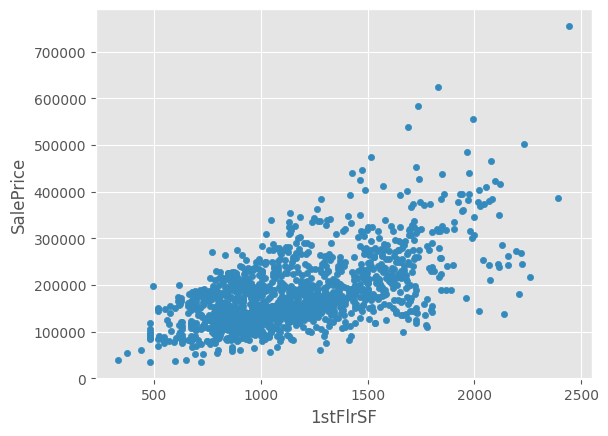

In [77]:
all_df.plot.scatter(x="1stFlrSF", y="SalePrice")
all_df[all_df["1stFlrSF"] > 4000]

In [40]:
all_df = all_df[(all_df['BsmtFinSF1'] < 2000) | (all_df['SalePrice'].isnull())]
all_df = all_df[(all_df['TotalBsmtSF'] < 3000) | (all_df['SalePrice'].isnull())]
all_df = all_df[(all_df['GrLivArea'] < 4500) | (all_df['SalePrice'].isnull())]
all_df = all_df[(all_df['1stFlrSF'] < 2500) | (all_df['SalePrice'].isnull())]
all_df = all_df[(all_df['LotArea'] < 100000) | (all_df['SalePrice'].isnull())]
categories = categories.drop(["PoolQC","MiscFeature","Alley"])
for cat in categories:
    le = LabelEncoder()
    print(cat)

    all_df[cat].fillna("missing", inplace=True)
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype("category")

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
SaleType
SaleCondition


In [42]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice","SalePrice_log", "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [44]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets=lgb_eval,
                          num_boost_round=100)

    # 최적의 반복 횟수를 early stopping으로 찾은 후 사용
    best_iteration = model_lgb.best_iteration
    y_pred = model_lgb.predict(X_valid, num_iteration=best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.873882
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.445584
[LightGBM] [Debug] init for col-wise cost 0.312716 seconds, init for row-wise cost 0.066281 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.313308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 2949
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 72
[LightGBM] [Info] Start training from score 12.010615
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tre

In [45]:
sum(rmses)/len(rmses)

0.07082003638822175

In [78]:
all_df[["YearBuilt","YearRemodAdd","GarageYrBlt","YrSold"]].describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
count,2904.000000,2904.000000,2745.000000,2904.000000
mean,1971.234504,1984.217975,1978.061202,2007.792011
std,30.319059,20.907346,25.600996,1.316366
min,1872.000000,1950.000000,1895.000000,2006.000000
25%,1953.000000,1965.000000,1960.000000,2007.000000
50%,1973.000000,1993.000000,1979.000000,2008.000000
75%,2001.000000,2004.000000,2002.000000,2009.000000
max,2010.000000,2010.000000,2207.000000,2010.000000


In [46]:
all_df["Age"] = all_df["YrSold"] - all_df["YearBuilt"]
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice","SalePrice_log","Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets=lgb_eval,
                          num_boost_round=100)

    # 최적의 반복 횟수를 early stopping으로 찾은 후 사용
    best_iteration = model_lgb.best_iteration
    y_pred = model_lgb.predict(X_valid, num_iteration=best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.873882
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.440092
[LightGBM] [Debug] init for col-wise cost 0.001348 seconds, init for row-wise cost 0.001773 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 3046
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 73
[LightGBM] [Info] Start training from score 12.010615
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tre

In [47]:
sum(rmses)/len(rmses)

0.07040886554559689

In [79]:
all_df[["LotArea","MasVnrArea","BsmtUnfSF","TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea","WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "LotFrontage"]].describe()

,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,LotFrontage
count,2904.000000,2882.000000,2903.000000,2903.000000,2904.000000,2904.000000,2904.000000,2904.000000,2903.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2425.000000
mean,9912.604683,101.191187,559.850499,1043.794006,1152.707300,336.355372,4.718664,1493.781336,471.632794,93.265840,47.226584,22.988636,2.615702,16.086777,1.907025,69.071340
std,5178.128224,177.804595,438.438879,420.008348,377.291394,427.355787,46.515308,491.149725,214.551791,125.855568,67.195477,64.055325,25.252464,56.245764,33.082892,22.662001
min,1300.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,7448.250000,0.000000,220.000000,791.500000,875.750000,0.000000,0.000000,1124.000000,319.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000
50%,9422.000000,0.000000,467.000000,988.000000,1080.000000,0.000000,0.000000,1441.000000,478.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,68.000000
75%,11503.000000,164.000000,802.500000,1296.000000,1381.250000,704.000000,0.000000,1739.250000,576.000000,168.000000,69.250000,0.000000,0.000000,0.000000,0.000000,80.000000
max,70761.000000,1600.000000,2336.000000,5095.000000,5095.000000,1872.000000,1064.000000,5095.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,313.000000


In [80]:
all_df["TotalSF"] = all_df["TotalBsmtSF"] + all_df["1stFlrSF"] + all_df["2ndFlrSF"]
all_df["Total_Bathrooms"] = all_df["FullBath"] + all_df["HalfBath"] + all_df["BsmtFullBath"] + all_df["BsmtHalfBath"]
all_df["Total_PorchSF"] = all_df["WoodDeckSF"] + all_df["OpenPorchSF"] + all_df["EnclosedPorch"] + all_df["3SsnPorch"] + all_df["ScreenPorch"]
all_df["hasPorch"] = all_df["Total_PorchSF"].apply(lambda x: 1 if x > 0 else 0)
all_df = all_df.drop("Total_PorchSF",axis=1)
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice","SalePrice_log","Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets=lgb_eval,
                          num_boost_round=100)

    # 최적의 반복 횟수를 early stopping으로 찾은 후 사용
    best_iteration = model_lgb.best_iteration
    y_pred = model_lgb.predict(X_valid, num_iteration=best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.873882
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.425974
[LightGBM] [Debug] init for col-wise cost 0.001641 seconds, init for row-wise cost 0.001718 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 3310
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 76
[LightGBM] [Info] Start training from score 12.010615
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tre

In [81]:
sum(rmses)/len(rmses)

0.06942297436217816

In [87]:
lgbm_params = {
    "objective":"regression",
    "random_seed":1234,
    "learning_rate":0.05,
    "n_estimators":1000,
    "num_leaves":12,
    "bagging_fraction": 0.8319278029616157,
    "bagging_freq": 5,
    "feature_fraction": 0.4874544371547538,
    "max_bin":189,
    "min_data_in_leaf":13,
    "min_sum_hessian_in_leaf":4
}

In [88]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets=lgb_eval,
                          num_boost_round=100)

    # 최적의 반복 횟수를 early stopping으로 찾은 후 사용
    best_iteration = model_lgb.best_iteration
    y_pred = model_lgb.predict(X_valid, num_iteration=best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2910
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 78
[LightGBM] [Info] Start training from score 12.010615
0.009953858580712948
0.11732325592762391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2908
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 78
[LightGBM] [Info] Start training from score 12.018820
0.011515243932247933
0.1341976529307571
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001301 seconds.
You c

In [89]:
sum(rmses)/len(rmses)

0.06644506493341922

In [90]:
test_X = test_df_le.drop(["SalePrice", "Id"], axis=1)
preds = []

for model in models:
    pred = model.predict(test_X)
    preds.append(pred)
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis=0)
preds_exp = np.exp(preds_mean)
len(preds_exp)

1459

In [92]:
import xgboost as xgb
categories = train_X.columns[train_X.dtypes == "category"]
for col in categories:
    train_X[col] = train_X[col].astype("int8")
    test_X[col] = test_X[col].astype("int8")
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2, random_state=1234, shuffle=False,  stratify=None)
def objective(trial):
    xgb_params = {
    "learning_rate":0.05,
    "seed":1234,
    "max_depth":trial.suggest_int("max_depth",3,16),
    "colsample_bytree":trial.suggest_uniform("colsample_bytree",0.2,0.9),
    "sublsample":trial.suggest_uniform("sublsample",0.2,0.9),
    }
    xgb_train = xgb.DMatrix(X_train, label=y_train)
    xgb_eval = xgb.DMatrix(X_valid, label=y_valid)
    evals = [(xgb_train, "train"), (xgb_eval, "eval")]
    model_xgb = xgb.train(xgb_params, xgb_train,
    evals=evals,
    num_boost_round=1000,
    early_stopping_rounds=20,
    verbose_eval=10,)
    y_pred = model_xgb.predict(xgb_eval)
    score = np.sqrt(mean_squared_error(y_valid, y_pred))
    return score

In [93]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-12-02 06:46:17,465] A new study created in memory with name: no-name-94eea21c-e8d8-4d57-a251-401a43cb0f4b


[0]	train-rmse:0.37912	eval-rmse:0.36305
[10]	train-rmse:0.24443	eval-rmse:0.25428
[20]	train-rmse:0.16048	eval-rmse:0.19439
[30]	train-rmse:0.10725	eval-rmse:0.16294
[40]	train-rmse:0.07295	eval-rmse:0.14794
[50]	train-rmse:0.05060	eval-rmse:0.14121
[60]	train-rmse:0.03570	eval-rmse:0.13739
[70]	train-rmse:0.02570	eval-rmse:0.13548
[80]	train-rmse:0.01883	eval-rmse:0.13425
[90]	train-rmse:0.01391	eval-rmse:0.13372
[100]	train-rmse:0.01053	eval-rmse:0.13330
[110]	train-rmse:0.00811	eval-rmse:0.13295
[120]	train-rmse:0.00634	eval-rmse:0.13281
[130]	train-rmse:0.00511	eval-rmse:0.13274
[140]	train-rmse:0.00413	eval-rmse:0.13268
[150]	train-rmse:0.00344	eval-rmse:0.13265
[160]	train-rmse:0.00292	eval-rmse:0.13262
[170]	train-rmse:0.00250	eval-rmse:0.13257
[180]	train-rmse:0.00213	eval-rmse:0.13255
[190]	train-rmse:0.00186	eval-rmse:0.13252
[200]	train-rmse:0.00164	eval-rmse:0.13252
[210]	train-rmse:0.00148	eval-rmse:0.13252
[215]	train-rmse:0.00139	eval-rmse:0.13252


[I 2023-12-02 06:46:23,379] Trial 0 finished with value: 0.1325160957379954 and parameters: {'max_depth': 10, 'colsample_bytree': 0.7006325564606937, 'sublsample': 0.6219343632501507}. Best is trial 0 with value: 0.1325160957379954.


[0]	train-rmse:0.37909	eval-rmse:0.36297
[10]	train-rmse:0.24529	eval-rmse:0.25194
[20]	train-rmse:0.16190	eval-rmse:0.19136
[30]	train-rmse:0.10877	eval-rmse:0.15913
[40]	train-rmse:0.07474	eval-rmse:0.14352
[50]	train-rmse:0.05183	eval-rmse:0.13602
[60]	train-rmse:0.03690	eval-rmse:0.13231
[70]	train-rmse:0.02682	eval-rmse:0.13041
[80]	train-rmse:0.01973	eval-rmse:0.12970
[90]	train-rmse:0.01479	eval-rmse:0.12912
[100]	train-rmse:0.01137	eval-rmse:0.12897
[110]	train-rmse:0.00890	eval-rmse:0.12871
[120]	train-rmse:0.00707	eval-rmse:0.12860
[130]	train-rmse:0.00577	eval-rmse:0.12846
[140]	train-rmse:0.00485	eval-rmse:0.12838
[150]	train-rmse:0.00408	eval-rmse:0.12832
[160]	train-rmse:0.00343	eval-rmse:0.12828
[170]	train-rmse:0.00298	eval-rmse:0.12827
[180]	train-rmse:0.00260	eval-rmse:0.12827
[190]	train-rmse:0.00227	eval-rmse:0.12824
[200]	train-rmse:0.00204	eval-rmse:0.12822
[210]	train-rmse:0.00186	eval-rmse:0.12821
[220]	train-rmse:0.00166	eval-rmse:0.12818
[230]	train-rmse:0.001

[I 2023-12-02 06:46:26,578] Trial 1 finished with value: 0.12816737574294046 and parameters: {'max_depth': 10, 'colsample_bytree': 0.49655835953723326, 'sublsample': 0.6521258791466593}. Best is trial 1 with value: 0.12816737574294046.


[0]	train-rmse:0.37915	eval-rmse:0.36335
[10]	train-rmse:0.24466	eval-rmse:0.25302
[20]	train-rmse:0.16087	eval-rmse:0.19254
[30]	train-rmse:0.10790	eval-rmse:0.16324
[40]	train-rmse:0.07393	eval-rmse:0.14849
[50]	train-rmse:0.05171	eval-rmse:0.14240
[60]	train-rmse:0.03692	eval-rmse:0.13928
[70]	train-rmse:0.02701	eval-rmse:0.13787
[80]	train-rmse:0.02029	eval-rmse:0.13702
[90]	train-rmse:0.01565	eval-rmse:0.13672
[100]	train-rmse:0.01250	eval-rmse:0.13667
[110]	train-rmse:0.01014	eval-rmse:0.13663
[120]	train-rmse:0.00844	eval-rmse:0.13654
[130]	train-rmse:0.00721	eval-rmse:0.13638
[140]	train-rmse:0.00619	eval-rmse:0.13623
[150]	train-rmse:0.00544	eval-rmse:0.13618
[160]	train-rmse:0.00497	eval-rmse:0.13611
[170]	train-rmse:0.00448	eval-rmse:0.13608
[180]	train-rmse:0.00407	eval-rmse:0.13606
[190]	train-rmse:0.00370	eval-rmse:0.13601
[200]	train-rmse:0.00343	eval-rmse:0.13602
[210]	train-rmse:0.00318	eval-rmse:0.13602
[211]	train-rmse:0.00317	eval-rmse:0.13602


[I 2023-12-02 06:46:32,325] Trial 2 finished with value: 0.13601613482185648 and parameters: {'max_depth': 9, 'colsample_bytree': 0.8242411005474559, 'sublsample': 0.8745639323507204}. Best is trial 1 with value: 0.12816737574294046.


[0]	train-rmse:0.37928	eval-rmse:0.36322
[10]	train-rmse:0.24605	eval-rmse:0.25152
[20]	train-rmse:0.16329	eval-rmse:0.19117
[30]	train-rmse:0.11131	eval-rmse:0.16068
[40]	train-rmse:0.07814	eval-rmse:0.14548
[50]	train-rmse:0.05641	eval-rmse:0.13919
[60]	train-rmse:0.04214	eval-rmse:0.13564
[70]	train-rmse:0.03254	eval-rmse:0.13386
[80]	train-rmse:0.02610	eval-rmse:0.13266
[90]	train-rmse:0.02143	eval-rmse:0.13208
[100]	train-rmse:0.01806	eval-rmse:0.13157
[110]	train-rmse:0.01551	eval-rmse:0.13123
[120]	train-rmse:0.01379	eval-rmse:0.13104
[130]	train-rmse:0.01256	eval-rmse:0.13087
[140]	train-rmse:0.01160	eval-rmse:0.13077
[150]	train-rmse:0.01097	eval-rmse:0.13065
[160]	train-rmse:0.01026	eval-rmse:0.13057
[170]	train-rmse:0.00969	eval-rmse:0.13050
[180]	train-rmse:0.00911	eval-rmse:0.13046
[190]	train-rmse:0.00835	eval-rmse:0.13043
[200]	train-rmse:0.00789	eval-rmse:0.13043
[204]	train-rmse:0.00761	eval-rmse:0.13046


[I 2023-12-02 06:46:34,767] Trial 3 finished with value: 0.13045984659228446 and parameters: {'max_depth': 8, 'colsample_bytree': 0.7542075266578652, 'sublsample': 0.5702264438270331}. Best is trial 1 with value: 0.12816737574294046.


[0]	train-rmse:0.37910	eval-rmse:0.36338
[10]	train-rmse:0.24426	eval-rmse:0.25446
[20]	train-rmse:0.15976	eval-rmse:0.19267
[30]	train-rmse:0.10621	eval-rmse:0.16188
[40]	train-rmse:0.07197	eval-rmse:0.14793
[50]	train-rmse:0.04958	eval-rmse:0.14202
[60]	train-rmse:0.03476	eval-rmse:0.13961
[70]	train-rmse:0.02482	eval-rmse:0.13834
[80]	train-rmse:0.01802	eval-rmse:0.13809
[90]	train-rmse:0.01334	eval-rmse:0.13781
[100]	train-rmse:0.01000	eval-rmse:0.13765
[110]	train-rmse:0.00763	eval-rmse:0.13753
[120]	train-rmse:0.00595	eval-rmse:0.13747
[130]	train-rmse:0.00469	eval-rmse:0.13748
[140]	train-rmse:0.00379	eval-rmse:0.13745
[150]	train-rmse:0.00309	eval-rmse:0.13741
[160]	train-rmse:0.00260	eval-rmse:0.13739
[170]	train-rmse:0.00222	eval-rmse:0.13739
[180]	train-rmse:0.00193	eval-rmse:0.13739
[190]	train-rmse:0.00169	eval-rmse:0.13738
[200]	train-rmse:0.00147	eval-rmse:0.13738
[210]	train-rmse:0.00132	eval-rmse:0.13737
[220]	train-rmse:0.00120	eval-rmse:0.13735
[230]	train-rmse:0.001

[I 2023-12-02 06:46:39,184] Trial 4 finished with value: 0.13734468423413607 and parameters: {'max_depth': 10, 'colsample_bytree': 0.8479176468048626, 'sublsample': 0.24972524073852087}. Best is trial 1 with value: 0.12816737574294046.


[0]	train-rmse:0.38207	eval-rmse:0.36488
[10]	train-rmse:0.26884	eval-rmse:0.26257
[20]	train-rmse:0.20071	eval-rmse:0.20422
[30]	train-rmse:0.15914	eval-rmse:0.16940
[40]	train-rmse:0.13362	eval-rmse:0.15032
[50]	train-rmse:0.11627	eval-rmse:0.13905
[60]	train-rmse:0.10500	eval-rmse:0.13307
[70]	train-rmse:0.09660	eval-rmse:0.12810
[80]	train-rmse:0.09064	eval-rmse:0.12486
[90]	train-rmse:0.08575	eval-rmse:0.12273
[100]	train-rmse:0.08180	eval-rmse:0.12104
[110]	train-rmse:0.07841	eval-rmse:0.11940
[120]	train-rmse:0.07569	eval-rmse:0.11820
[130]	train-rmse:0.07311	eval-rmse:0.11702
[140]	train-rmse:0.07102	eval-rmse:0.11641
[150]	train-rmse:0.06926	eval-rmse:0.11578
[160]	train-rmse:0.06734	eval-rmse:0.11543
[170]	train-rmse:0.06549	eval-rmse:0.11529
[180]	train-rmse:0.06400	eval-rmse:0.11475
[190]	train-rmse:0.06244	eval-rmse:0.11438
[200]	train-rmse:0.06117	eval-rmse:0.11387
[210]	train-rmse:0.05990	eval-rmse:0.11363
[220]	train-rmse:0.05874	eval-rmse:0.11349
[230]	train-rmse:0.057

[I 2023-12-02 06:46:39,820] Trial 5 finished with value: 0.11338105655867788 and parameters: {'max_depth': 4, 'colsample_bytree': 0.214152878208228, 'sublsample': 0.7828338918835567}. Best is trial 5 with value: 0.11338105655867788.


[0]	train-rmse:0.37906	eval-rmse:0.36338
[10]	train-rmse:0.24382	eval-rmse:0.25298
[20]	train-rmse:0.15934	eval-rmse:0.19456
[30]	train-rmse:0.10573	eval-rmse:0.16415
[40]	train-rmse:0.07115	eval-rmse:0.14994
[50]	train-rmse:0.04867	eval-rmse:0.14383
[60]	train-rmse:0.03379	eval-rmse:0.14116
[70]	train-rmse:0.02382	eval-rmse:0.13988
[80]	train-rmse:0.01708	eval-rmse:0.13936
[90]	train-rmse:0.01237	eval-rmse:0.13895
[100]	train-rmse:0.00901	eval-rmse:0.13877
[110]	train-rmse:0.00662	eval-rmse:0.13865
[120]	train-rmse:0.00489	eval-rmse:0.13857
[130]	train-rmse:0.00365	eval-rmse:0.13855
[140]	train-rmse:0.00275	eval-rmse:0.13851
[150]	train-rmse:0.00209	eval-rmse:0.13851
[160]	train-rmse:0.00160	eval-rmse:0.13850
[170]	train-rmse:0.00124	eval-rmse:0.13850
[173]	train-rmse:0.00115	eval-rmse:0.13849


[I 2023-12-02 06:46:48,755] Trial 6 finished with value: 0.13848573656622248 and parameters: {'max_depth': 13, 'colsample_bytree': 0.8090085037727734, 'sublsample': 0.8850328395629348}. Best is trial 5 with value: 0.11338105655867788.


[0]	train-rmse:0.37906	eval-rmse:0.36263
[10]	train-rmse:0.24451	eval-rmse:0.25255
[20]	train-rmse:0.16028	eval-rmse:0.19062
[30]	train-rmse:0.10675	eval-rmse:0.15926
[40]	train-rmse:0.07236	eval-rmse:0.14434
[50]	train-rmse:0.04956	eval-rmse:0.13674
[60]	train-rmse:0.03448	eval-rmse:0.13279
[70]	train-rmse:0.02434	eval-rmse:0.13088
[80]	train-rmse:0.01740	eval-rmse:0.12981
[90]	train-rmse:0.01252	eval-rmse:0.12937
[100]	train-rmse:0.00915	eval-rmse:0.12918
[110]	train-rmse:0.00673	eval-rmse:0.12902
[120]	train-rmse:0.00498	eval-rmse:0.12888
[130]	train-rmse:0.00373	eval-rmse:0.12879
[140]	train-rmse:0.00282	eval-rmse:0.12874
[150]	train-rmse:0.00215	eval-rmse:0.12873
[160]	train-rmse:0.00166	eval-rmse:0.12870
[170]	train-rmse:0.00130	eval-rmse:0.12869
[180]	train-rmse:0.00103	eval-rmse:0.12868
[190]	train-rmse:0.00084	eval-rmse:0.12867
[200]	train-rmse:0.00071	eval-rmse:0.12866
[210]	train-rmse:0.00061	eval-rmse:0.12866
[220]	train-rmse:0.00056	eval-rmse:0.12865
[230]	train-rmse:0.000

[I 2023-12-02 06:46:53,320] Trial 7 finished with value: 0.12863862375414611 and parameters: {'max_depth': 14, 'colsample_bytree': 0.5230355535770523, 'sublsample': 0.7463704234005188}. Best is trial 5 with value: 0.11338105655867788.


[0]	train-rmse:0.38085	eval-rmse:0.36380
[10]	train-rmse:0.26270	eval-rmse:0.25773
[20]	train-rmse:0.19279	eval-rmse:0.19873
[30]	train-rmse:0.15082	eval-rmse:0.16649
[40]	train-rmse:0.12484	eval-rmse:0.14822
[50]	train-rmse:0.10839	eval-rmse:0.13832
[60]	train-rmse:0.09739	eval-rmse:0.13292
[70]	train-rmse:0.08943	eval-rmse:0.12900
[80]	train-rmse:0.08361	eval-rmse:0.12663
[90]	train-rmse:0.07931	eval-rmse:0.12466
[100]	train-rmse:0.07582	eval-rmse:0.12355
[110]	train-rmse:0.07274	eval-rmse:0.12230
[120]	train-rmse:0.07039	eval-rmse:0.12133
[130]	train-rmse:0.06812	eval-rmse:0.12039
[140]	train-rmse:0.06631	eval-rmse:0.11969
[150]	train-rmse:0.06476	eval-rmse:0.11930
[160]	train-rmse:0.06316	eval-rmse:0.11902
[170]	train-rmse:0.06164	eval-rmse:0.11901
[180]	train-rmse:0.06028	eval-rmse:0.11905
[183]	train-rmse:0.06001	eval-rmse:0.11892


[I 2023-12-02 06:46:53,946] Trial 8 finished with value: 0.11891739535032449 and parameters: {'max_depth': 4, 'colsample_bytree': 0.6479447149292666, 'sublsample': 0.30034730118633246}. Best is trial 5 with value: 0.11338105655867788.


[0]	train-rmse:0.37910	eval-rmse:0.36323
[10]	train-rmse:0.24432	eval-rmse:0.25272
[20]	train-rmse:0.16007	eval-rmse:0.19196
[30]	train-rmse:0.10661	eval-rmse:0.16148
[40]	train-rmse:0.07216	eval-rmse:0.14618
[50]	train-rmse:0.04941	eval-rmse:0.13839
[60]	train-rmse:0.03436	eval-rmse:0.13453
[70]	train-rmse:0.02415	eval-rmse:0.13268
[80]	train-rmse:0.01728	eval-rmse:0.13154
[90]	train-rmse:0.01243	eval-rmse:0.13101
[100]	train-rmse:0.00908	eval-rmse:0.13076
[110]	train-rmse:0.00667	eval-rmse:0.13058
[120]	train-rmse:0.00495	eval-rmse:0.13056
[130]	train-rmse:0.00371	eval-rmse:0.13051
[140]	train-rmse:0.00281	eval-rmse:0.13047
[150]	train-rmse:0.00214	eval-rmse:0.13045
[160]	train-rmse:0.00164	eval-rmse:0.13042
[170]	train-rmse:0.00127	eval-rmse:0.13041
[180]	train-rmse:0.00100	eval-rmse:0.13041
[190]	train-rmse:0.00081	eval-rmse:0.13039
[200]	train-rmse:0.00067	eval-rmse:0.13038
[210]	train-rmse:0.00059	eval-rmse:0.13038
[220]	train-rmse:0.00053	eval-rmse:0.13037
[230]	train-rmse:0.000

[I 2023-12-02 06:47:01,544] Trial 9 finished with value: 0.13036116820487298 and parameters: {'max_depth': 16, 'colsample_bytree': 0.5652938252250501, 'sublsample': 0.4902633579933665}. Best is trial 5 with value: 0.11338105655867788.


{'max_depth': 4,
 'colsample_bytree': 0.214152878208228,
 'sublsample': 0.7828338918835567}

In [95]:
xgb_params = {
"learning_rate":0.05,
"seed":1234,
"max_depth": 6,
"colsample_bytree": 0.330432640328732,
"sublsample": 0.7158427239902707
}
models_xgb = []
rmses_xgb = []
oof_xgb = np.zeros(len(train_X))
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    xgb_train = xgb.DMatrix(X_train, label=y_train)
    xgb_eval = xgb.DMatrix(X_valid, label=y_valid)
    evals = [(xgb_train, "train"), (xgb_eval, "eval")]
    model_xgb = xgb.train(xgb_params, xgb_train,
    evals=evals,
    num_boost_round=1000,
    early_stopping_rounds=20,
    verbose_eval=20,)
    y_pred = model_xgb.predict(xgb_eval)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    models_xgb.append(model_xgb)
    rmses_xgb.append(tmp_rmse)
    oof_xgb[val_index] = y_pred

[0]	train-rmse:0.37477	eval-rmse:0.38400
[20]	train-rmse:0.17669	eval-rmse:0.20640
[40]	train-rmse:0.09769	eval-rmse:0.14891
[60]	train-rmse:0.06538	eval-rmse:0.13103
[80]	train-rmse:0.05034	eval-rmse:0.12462
[100]	train-rmse:0.04165	eval-rmse:0.12188
[120]	train-rmse:0.03638	eval-rmse:0.12055
[140]	train-rmse:0.03234	eval-rmse:0.11977
[160]	train-rmse:0.02966	eval-rmse:0.11939
[180]	train-rmse:0.02764	eval-rmse:0.11908
[200]	train-rmse:0.02556	eval-rmse:0.11890
[220]	train-rmse:0.02402	eval-rmse:0.11885
[240]	train-rmse:0.02246	eval-rmse:0.11879
[260]	train-rmse:0.02121	eval-rmse:0.11868
[280]	train-rmse:0.01965	eval-rmse:0.11856
[300]	train-rmse:0.01805	eval-rmse:0.11855
[306]	train-rmse:0.01770	eval-rmse:0.11857
0.11857302205498595
[0]	train-rmse:0.37180	eval-rmse:0.38972
[20]	train-rmse:0.17294	eval-rmse:0.22293
[40]	train-rmse:0.09512	eval-rmse:0.17000
[60]	train-rmse:0.06260	eval-rmse:0.15222
[80]	train-rmse:0.04718	eval-rmse:0.14541
[100]	train-rmse:0.03865	eval-rmse:0.14218
[12

In [96]:
sum(rmses_xgb)/len(rmses_xgb)

0.12335958069346918